# Quantum Teleportation Circuit

In [1]:
from qutip_qip.circuit import QubitCircuit, Measurement, Gate
from qutip import basis, tensor, identity
from math import sqrt

## Introduction 

This notebook introduces the basic quantum teleportation circuit (http://www.physics.udel.edu/~msafrono/425-2011/Lecture%2025-1.pdf), complete with measurements and classical control. This notebook also serves as an example on how to add measurement gates and classical controls to a circuit.

We will describe the circuit that enables quantum teleportation. We will use two classical wires and three qubit wires. The first qubit wire represents the quantum state $| q0 ⟩ = | \psi ⟩$ that needs to be transferred from Alice to Bob (so the first qubit is in the possession of Alice). 

In [2]:
teleportation = QubitCircuit(3, num_cbits = 2, input_states = ["\psi", "0", "0", "c0", "c1"])

First, Alice and Bob need to create the shared EPR pair ($\frac{| 00 ⟩ + | 11 ⟩} {2}$) between the second and third qubit by using the hadamard gate on Alice's qubit followed by an entangling CNOT gate.  

In [3]:
teleportation.add_gate("SNOT", targets=[1])
teleportation.add_gate("CNOT", targets=[2], controls=[1])

Following this, Alice makes the qubit $| q0 ⟩$ interact with Alice's EPR qubit, followed by measuring on the two qubits belonging to Alice. The measurement results for the first qubit is stored in classical register $c1$ and the second qubit is stored in classical register $c0$.

In [4]:
teleportation.add_gate("CNOT", targets=[1], controls=[0])
teleportation.add_gate("SNOT", targets=[0])

teleportation.add_measurement("M0", targets=[0], classical_store=1)
teleportation.add_measurement("M1", targets=[1], classical_store=0)

Now, we apply the $X$ gate on Bob's qubit based on the classical control $c0$ and $Z$ gate based on classical control $c1$. These operations correspond to the following operations based on the state of Alice's measurement. 

$|00⟩ \rightarrow $ no operation \
$|01⟩ \rightarrow Z$ \
$|10⟩ \rightarrow X$ \
$|11⟩ \rightarrow ZX$ 

The final circuit mathematically must result in the third qubit taking the state $|\psi⟩$. 

In [5]:
teleportation.add_gate("X", targets=[2], classical_controls=[0])
teleportation.add_gate("Z", targets=[2], classical_controls=[1])

Finally, our teleportation circuit is ready to run, we can view the circuit structure using the following command. 

In [6]:
teleportation.gates

[Gate(SNOT, targets=[1], controls=None, classical controls=None, control_value=None),
 Gate(CNOT, targets=[2], controls=[1], classical controls=None, control_value=None),
 Gate(CNOT, targets=[1], controls=[0], classical controls=None, control_value=None),
 Gate(SNOT, targets=[0], controls=None, classical controls=None, control_value=None),
 Measurement(M0, target=[0], classical_store=1),
 Measurement(M1, target=[1], classical_store=0),
 Gate(X, targets=[2], controls=None, classical controls=[0], control_value=None),
 Gate(Z, targets=[2], controls=None, classical controls=[1], control_value=None)]

The circuit can also be visualized:

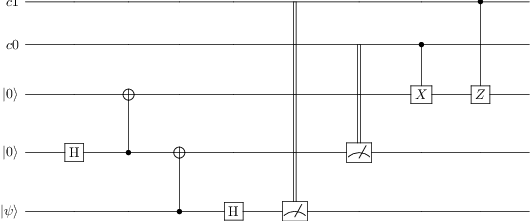

In [7]:
teleportation

The first qubit is user-specified $|\psi ⟩$ state and the other two must be $|0⟩$. 

### Example 1 
#### $|\psi⟩ = |+ ⟩$  

In [8]:
a = 1/sqrt(2) * basis(2, 0) + 1/sqrt(2) * basis(2, 1)
state = tensor(a, basis(2,0), basis(2,0))

We can confirm our state is initialized correctly by observing the measurment statistics on the first qubit, followed by which we run the circuit.

In [9]:
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

We can run the circuit using the `QubitCircuit.run()` function which provided the initial state-vector (or density matrix) initiates one run on the circuit (including sampling any intermediate measurements) and providing the final results (any classical bits can also be explicitly set using the argument `cbits`). The results are returned as a `Result` object. The result states can be accessed through the `get_states()` function where the argument `index=0` specifies the first(only) result should be returned

In [10]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]


After running, we can see the measurement statistics on the last qubit to see that the qubit is teleported correctly. 

In [11]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]],
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]]],
 [0.4999999999999999, 0.4999999999999999])

### Example 2 
#### $|\psi⟩ = |1 ⟩$  

In [12]:
state = tensor(basis(2,1), basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([None,
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

In [13]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [14]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([None,
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

Another useful feature of the circuit module is the **QubitCircuit.run_statistics()** feature which provides the opportunity to gather all the possible output states of the circuit along with their output probabilities. Again, the results are returned as a `Result` object. The result states and respective probabilites can be accessed through the `get_results()` function. 

In [15]:
results = teleportation.run_statistics(state)
results.probabilities

[0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994]

In [16]:
results.final_states

[Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]]]

In [17]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.6.0+c003ff5
Numpy,1.20.1
SciPy,1.5.3
matplotlib,3.3.0
Cython,0.29.21
Number of CPUs,12
BLAS Info,Generic
IPython,7.16.1
Python,"3.8.6 | packaged by conda-forge | (default, Oct 7 2020, 18:22:52) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
